In [1]:
import numpy as np
import networkx as nx
import scipy.linalg as slg
import matplotlib.pyplot as plt

In [2]:
# Create original graph
G1 = nx.Graph()
G1.add_nodes_from(range(14))
G1.add_edges_from([(0,3), (0,4), (0,5), (0,6), (0,7),
                   (1,2), (1,4), (1,5),
                   (2,3), (2,4), (2,6),
                   (3,4), (3,6), (3,7),
                   (4,5), (4,6), (4,13),
                   (5,6),
                   (7,8), (7,9), (7,10), (7,11), (7,12),
                   (8,9), (8,10), (8,11), (8,12), (8,13),
                   (9,10), (9,11), (9,13),
                   (10,11), (10,12), (10,13),
                   (11,12), (11,13),
                   (12,13)]
                 )

# Remove edges
G2 = G1.copy()
G2.remove_edges_from([(3,7), (4,13)])
G3 = G1.copy()
G3.remove_edges_from([(4,6), (8,9)])

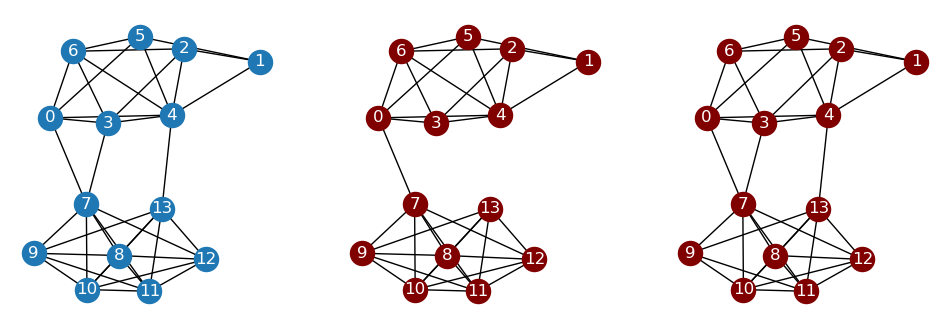

In [3]:
pos = nx.kamada_kawai_layout(G1)
fig, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
nx.draw_networkx(G1, pos=pos, font_color='white', ax=ax[0])
nx.draw_networkx(G2, pos=pos, node_color='maroon', font_color='white', ax=ax[1])
nx.draw_networkx(G3, pos=pos, node_color='maroon', font_color='white', ax=ax[2])
plt.savefig('../plots/inverse_laplace_distance.pdf', bbox_inches='tight')
plt.show()

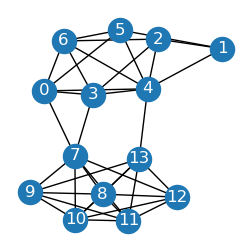

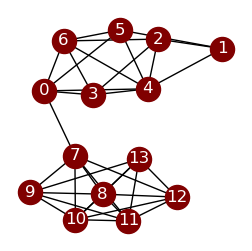

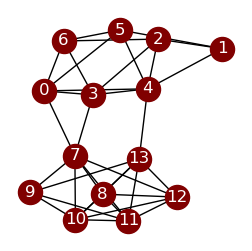

In [4]:
pos = nx.kamada_kawai_layout(G1)

fig, ax = plt.subplots(figsize=(3,3))
ax.set_axis_off()
nx.draw_networkx(G1, pos=pos, font_color='white')
plt.savefig('../plots/inverse_laplace_distance1.pdf', bbox_inches='tight')

fig, ax = plt.subplots(figsize=(3,3))
ax.set_axis_off()
nx.draw_networkx(G2, pos=pos, node_color='maroon', font_color='white')
plt.savefig('../plots/inverse_laplace_distance2.pdf', bbox_inches='tight')

fig, ax = plt.subplots(figsize=(3,3))
ax.set_axis_off()
nx.draw_networkx(G3, pos=pos, node_color='maroon', font_color='white')
plt.savefig('../plots/inverse_laplace_distance3.pdf', bbox_inches='tight')

In [5]:
def wass_dist(A, B):
    X = slg.pinv(A)
    Y = slg.pinv(B)
    return np.trace(X) + np.trace(Y) - 2 * np.trace(slg.sqrtm(X @ Y)).real

In [6]:
L1 = nx.laplacian_matrix(G1).todense()
L2 = nx.laplacian_matrix(G2).todense()
L3 = nx.laplacian_matrix(G3).todense()
print(f"$||L_1 - L_2||_F = {slg.norm(L1 - L2, ord='fro'):.3f}$")
print(f"$||L_1 - L_3||_F = {slg.norm(L1 - L3, ord='fro'):.3f}$")
print(f"$||L_1^\dagger - L_2^\dagger||_F = {slg.norm(slg.pinv(L1) - slg.pinv(L2), ord='fro'):.3f}$")
print(f"$||L_1^\dagger - L_3^\dagger||_F = {slg.norm(slg.pinv(L1) - slg.pinv(L3), ord='fro'):.3f}$")
print(f"$Wass dist G1, G2 = {wass_dist(L1, L2):.3f}$")
print(f"$Wass dist G1, G3 = {wass_dist(L1, L3):.3f}$")

$||L_1 - L_2||_F = 2.828$
$||L_1 - L_3||_F = 2.828$
$||L_1^\dagger - L_2^\dagger||_F = 3.245$
$||L_1^\dagger - L_3^\dagger||_F = 0.112$
$Wass dist G1, G2 = 0.912$
$Wass dist G1, G3 = 0.013$


<class 'networkx.utils.decorators.argmap'> compilation 4:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
